In [1]:
import numpy as np
import matplotlib.pyplot as plt
import qibo
import qibolab
from qibolab import Platform
from qibolab.pulses import PulseSequence

print(qibo.__version__)
print(qibolab.__version__)

0.1.9
0.0.1.dev6


In [2]:
platform = Platform('rfsoc')

[Qibo 0.1.9|INFO|2022-11-21 16:35:33]: Loading platform rfsoc from runcard /home/javierserrano/fpgaQCRdrivers/drivers/RFSoC4x2/qibolab/src/qibolab/runcards/rfsoc.yml


In [3]:
qd_pulse = platform.create_RX_pulse(0, start=0)
ro_pulse = platform.create_MZ_pulse(0, start=qd_pulse.start)

sequence = PulseSequence()
sequence.add(qd_pulse)
sequence.add(ro_pulse)

print(sequence)

PulseSequence
ReadoutPulse(0, 3000, 0.02, 7_271_250_000, 0, Rectangular(), 0, 0)
Pulse(0, 40, 0.566, 8_014_600_000, 0, Drag(5, 0.05096), 1, PulseType.DRIVE, 0)


In [7]:
result = platform.execute_pulse_sequence(sequence, 100)
print(result)

(array([-0.00425502, -0.00305046]), array([-0.00279164,  0.01007217]))


In [9]:
start = 10
stop = 100
step = 5

lengths = np.arange(start, stop, step)
results = []
for i, length in enumerate(lengths):
    qd_pulse = platform.create_RX_pulse(0, start=0)
    ro_pulse = platform.create_MZ_pulse(0, start=qd_pulse.start)
    qd_pulse.duration = length

    sequence = PulseSequence()
    sequence.add(qd_pulse)
    sequence.add(ro_pulse)

    avgi, avgq = platform.execute_pulse_sequence(sequence, length)
    results.append((avgi, avgq))

In [11]:
results.shape

(18, 2, 2)

In [12]:
results = np.array(results)
amp = np.abs(results[:, 0, 0] + 1j * results[:, 1, 0])
print(results.shape)
print(amp.shape)

(18, 2, 2)
(18,)


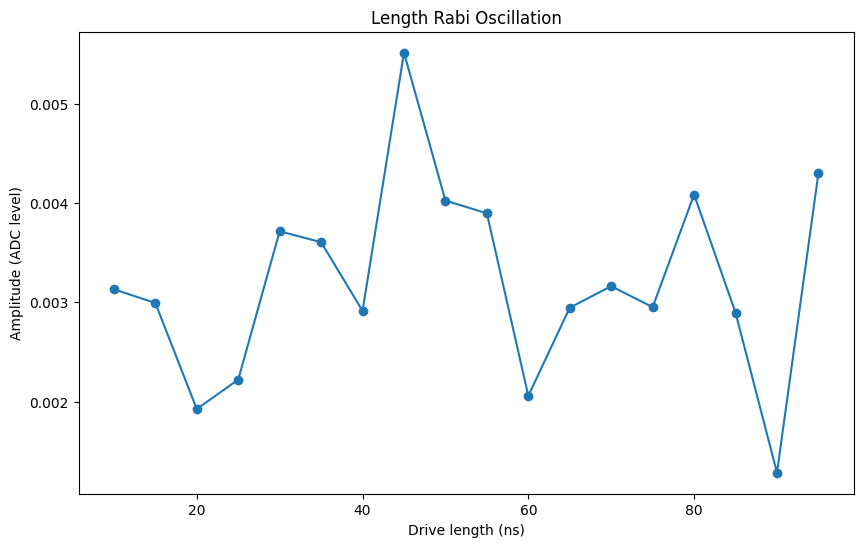

In [13]:
plt.figure(figsize=(10, 6))
plt.plot(lengths, amp, 'o-')
plt.title("Length Rabi Oscillation")
plt.xlabel("Drive length (ns)")
plt.ylabel("Amplitude (ADC level)")
plt.savefig("")